# Setup

In [249]:
import matplotlib.pyplot as plt
import numpy as np

StatementMeta(sparkpoolDev, 60, 2, Finished, Available, Finished)

In [250]:
import pandas as pd

data_lake_path ="abfss://beehive-container@dsaidatalakestorage.dfs.core.windows.net/"
source_path = f"{data_lake_path}silver/processing/"

spark_df_flow = spark.read.option("header", "true").option("inferSchema", "true").csv(source_path + 'flow_schwartau.csv')
spark_df_humi = spark.read.option("header", "true").option("inferSchema", "true").csv(source_path + 'humidity_schwartau.csv')
spark_df_temp = spark.read.option("header", "true").option("inferSchema", "true").csv(source_path + 'temperature_schwartau.csv')
spark_df_weight = spark.read.option("header", "true").option("inferSchema", "true").csv(source_path + 'weight_schwartau.csv')


# Convert the Spark DataFrames to pandas DataFrames
df_flow_schwartau = spark_df_flow.toPandas()
df_humi_schwartau = spark_df_humi.toPandas()
df_temp_schwartau = spark_df_temp.toPandas()
df_weight_schwartau = spark_df_weight.toPandas()

# Convert the timestamp column in each pandas DataFrame
df_flow_schwartau['timestamp'] = pd.to_datetime(df_flow_schwartau['timestamp'])
df_humi_schwartau['timestamp'] = pd.to_datetime(df_humi_schwartau['timestamp'])
df_temp_schwartau['timestamp'] = pd.to_datetime(df_temp_schwartau['timestamp'])
df_weight_schwartau['timestamp'] = pd.to_datetime(df_weight_schwartau['timestamp'])

StatementMeta(sparkpoolDev, 60, 3, Finished, Available, Finished)

# Phase I: Foundational Assessment and Structural Unification

### Analyse Shapes

In [251]:
print(df_flow_schwartau.shape)
print(df_humi_schwartau.shape)
print(df_temp_schwartau.shape)
print(df_weight_schwartau.shape)

StatementMeta(sparkpoolDev, 60, 4, Finished, Available, Finished)

(2513836, 2)
(1761, 2)
(253430, 2)
(1761, 2)


## flow_schwartau

In [252]:
df_flow_schwartau.info(show_counts=True)

StatementMeta(sparkpoolDev, 60, 5, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513836 entries, 0 to 2513835
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   timestamp  2513836 non-null  datetime64[ns]
 1   flow       2513836 non-null  int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 28.8 MB


In [253]:
df_flow_schwartau.columns

StatementMeta(sparkpoolDev, 60, 6, Finished, Available, Finished)

Index(['timestamp', 'flow'], dtype='object')

In [254]:
df_flow_schwartau.describe()

StatementMeta(sparkpoolDev, 60, 7, Finished, Available, Finished)

,flow
count,2.513836e+06
mean,1.624583e+00
std,5.432563e+01
min,-6.310000e+02
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,7.999000e+03


In [255]:
df_flow_schwartau["timestamp"].describe()

StatementMeta(sparkpoolDev, 60, 8, Finished, Available, Finished)

/tmp/ipykernel_7324/3271389643.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_flow_schwartau["timestamp"].describe()


count                 2513836
unique                1256798
top       2018-10-28 02:13:00
freq                        4
first     2017-01-01 14:15:00
last      2019-05-31 14:15:00
Name: timestamp, dtype: object

StatementMeta(sparkpoolDev, 60, 9, Finished, Available, Finished)

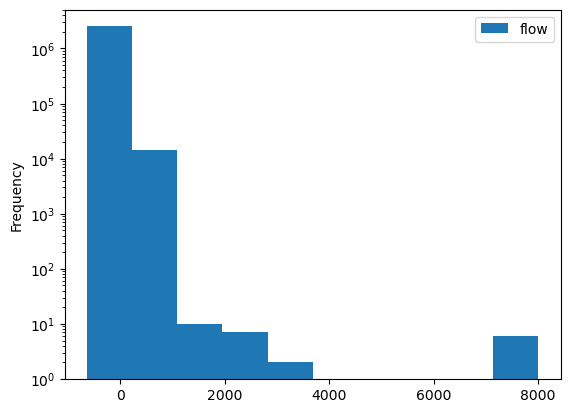

In [256]:
df_flow_schwartau.plot(kind="hist", y="flow")
plt.yscale('log')

<div class="alert alert-block alert-warning">
<b>Problem:</b> Outliers in flow.
</div>

In [257]:
df_flow_schwartau.isna().sum()

StatementMeta(sparkpoolDev, 60, 10, Finished, Available, Finished)

timestamp    0
flow         0
dtype: int64

In [258]:
df_flow_schwartau["flow"].nlargest(10)

StatementMeta(sparkpoolDev, 60, 11, Finished, Available, Finished)

2084055    7999
2098359    7999
2107004    7999
2107005    7999
2107009    7999
2107010    7999
2107023    3148
2101589    3042
1531827    2755
2091430    2629
Name: flow, dtype: int32

In [259]:
df_flow_schwartau.sort_values(by="timestamp").head(10)

StatementMeta(sparkpoolDev, 60, 12, Finished, Available, Finished)

,timestamp,flow
0,2017-01-01 14:15:00,0
1256918,2017-01-01 14:15:00,0
1256919,2017-01-01 14:16:00,0
1,2017-01-01 14:16:00,0
2,2017-01-01 14:17:00,0
1256920,2017-01-01 14:17:00,0
3,2017-01-01 14:18:00,0
1256921,2017-01-01 14:18:00,0
4,2017-01-01 14:19:00,0
1256922,2017-01-01 14:19:00,0


In [260]:
df_flow_schwartau.iloc[:(df_flow_schwartau.shape[0])//2]

StatementMeta(sparkpoolDev, 60, 13, Finished, Available, Finished)

,timestamp,flow
0,2017-01-01 14:15:00,0
1,2017-01-01 14:16:00,0
2,2017-01-01 14:17:00,0
3,2017-01-01 14:18:00,0
4,2017-01-01 14:19:00,0
...,...,...
1256913,2019-05-31 14:11:00,-241
1256914,2019-05-31 14:12:00,-226
1256915,2019-05-31 14:13:00,-208
1256916,2019-05-31 14:14:00,-217


In [261]:
df_flow_schwartau.iloc[(df_flow_schwartau.shape[0])//2:]

StatementMeta(sparkpoolDev, 60, 14, Finished, Available, Finished)

,timestamp,flow
1256918,2017-01-01 14:15:00,0
1256919,2017-01-01 14:16:00,0
1256920,2017-01-01 14:17:00,0
1256921,2017-01-01 14:18:00,0
1256922,2017-01-01 14:19:00,0
...,...,...
2513831,2019-05-31 14:11:00,128
2513832,2019-05-31 14:12:00,140
2513833,2019-05-31 14:13:00,144
2513834,2019-05-31 14:14:00,146


In [262]:
df_1 = df_flow_schwartau.iloc[:(df_flow_schwartau.shape[0])//2]
df_2 = df_flow_schwartau.iloc[(df_flow_schwartau.shape[0])//2:]

StatementMeta(sparkpoolDev, 60, 15, Finished, Available, Finished)

In [263]:
df_1.describe()

StatementMeta(sparkpoolDev, 60, 16, Finished, Available, Finished)

,flow
count,1.256918e+06
mean,-2.153213e+01
std,4.229649e+01
min,-6.310000e+02
25%,-2.400000e+01
50%,0.000000e+00
75%,0.000000e+00
max,0.000000e+00


In [264]:
df_2.describe()

StatementMeta(sparkpoolDev, 60, 17, Finished, Available, Finished)

,flow
count,1.256918e+06
mean,2.478130e+01
std,5.514607e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,2.400000e+01
max,7.999000e+03


In [265]:
df_departures_flow = df_flow_schwartau.iloc[:(df_flow_schwartau.shape[0])//2].copy()
df_arrivals_flow = df_flow_schwartau.iloc[(df_flow_schwartau.shape[0])//2:].copy()

StatementMeta(sparkpoolDev, 60, 18, Finished, Available, Finished)

In [266]:
df_departures_flow.duplicated().sum()

StatementMeta(sparkpoolDev, 60, 19, Finished, Available, Finished)

114

In [267]:
df_arrivals_flow.duplicated().sum()

StatementMeta(sparkpoolDev, 60, 20, Finished, Available, Finished)

120

<div class="alert alert-block alert-warning">
<b>Problem:</b> flow has duplicates
</div>

In [268]:
df_departures_flow.loc[df_departures_flow.duplicated(), "timestamp"].dt.date.unique()

StatementMeta(sparkpoolDev, 60, 21, Finished, Available, Finished)

array([datetime.date(2017, 10, 29), datetime.date(2018, 10, 28)],
      dtype=object)

In [269]:
df_departures_flow.loc[df_departures_flow.duplicated(), "timestamp"].dt.day_name().unique()

StatementMeta(sparkpoolDev, 60, 22, Finished, Available, Finished)

array(['Sunday'], dtype=object)

DST Time Issue

In [270]:
df_3 = df_departures_flow.copy()
df_3['timestamp'] = df_3['timestamp'].dt.tz_localize("Europe/Berlin", ambiguous='infer').dt.tz_convert("UTC")

StatementMeta(sparkpoolDev, 60, 23, Finished, Available, Finished)

In [271]:
df_3.duplicated().sum()

StatementMeta(sparkpoolDev, 60, 24, Finished, Available, Finished)

0

In [272]:
df_departures_flow["timestamp"] = df_departures_flow['timestamp'].dt.tz_localize("Europe/Berlin", ambiguous='infer').dt.tz_convert("UTC")
df_arrivals_flow["timestamp"] = df_arrivals_flow['timestamp'].dt.tz_localize("Europe/Berlin", ambiguous='infer').dt.tz_convert("UTC")

StatementMeta(sparkpoolDev, 60, 25, Finished, Available, Finished)

In [273]:
print(f"departures_flow duplicates: {df_departures_flow.duplicated().sum()}, arrivals_flow duplicates: {df_arrivals_flow.duplicated().sum()}")

StatementMeta(sparkpoolDev, 60, 26, Finished, Available, Finished)

departures_flow duplicates: 0, arrivals_flow duplicates: 0


In [274]:
# Merge df_departures_flow and df_arrivals_flow and save it to df_flow_schwartau
df_flow_schwartau = df_departures_flow.merge(df_arrivals_flow, on="timestamp", suffixes=("_out", "_in"))

StatementMeta(sparkpoolDev, 60, 27, Finished, Available, Finished)

<div class="alert alert-block alert-success">
<b>Fixed:</b> flow duplicates
</div>

In [275]:
df_flow_schwartau

StatementMeta(sparkpoolDev, 60, 28, Finished, Available, Finished)

,timestamp,flow_out,flow_in
0,2017-01-01 13:15:00+00:00,0,0
1,2017-01-01 13:16:00+00:00,0,0
2,2017-01-01 13:17:00+00:00,0,0
3,2017-01-01 13:18:00+00:00,0,0
4,2017-01-01 13:19:00+00:00,0,0
...,...,...,...
1256913,2019-05-31 12:11:00+00:00,-241,128
1256914,2019-05-31 12:12:00+00:00,-226,140
1256915,2019-05-31 12:13:00+00:00,-208,144
1256916,2019-05-31 12:14:00+00:00,-217,146


Merged and saved back to original df

In [276]:
df_flow_schwartau.timestamp.min()

StatementMeta(sparkpoolDev, 60, 29, Finished, Available, Finished)

Timestamp('2017-01-01 13:15:00+0000', tz='UTC')

In [277]:
df_flow_schwartau.timestamp.max()

StatementMeta(sparkpoolDev, 60, 30, Finished, Available, Finished)

Timestamp('2019-05-31 12:15:00+0000', tz='UTC')

In [278]:
df_flow_schwartau.timestamp.max() - df_flow_schwartau.timestamp.min()

StatementMeta(sparkpoolDev, 60, 31, Finished, Available, Finished)

Timedelta('879 days 23:00:00')

In [279]:
df_flow_schwartau['timestamp'].shift(1)

StatementMeta(sparkpoolDev, 60, 32, Finished, Available, Finished)

0                               NaT
1         2017-01-01 13:15:00+00:00
2         2017-01-01 13:16:00+00:00
3         2017-01-01 13:17:00+00:00
4         2017-01-01 13:18:00+00:00
                     ...           
1256913   2019-05-31 12:10:00+00:00
1256914   2019-05-31 12:11:00+00:00
1256915   2019-05-31 12:12:00+00:00
1256916   2019-05-31 12:13:00+00:00
1256917   2019-05-31 12:14:00+00:00
Name: timestamp, Length: 1256918, dtype: datetime64[ns, UTC]

In [280]:
(df_flow_schwartau['timestamp'] - df_flow_schwartau['timestamp'].shift(1)).nunique()

StatementMeta(sparkpoolDev, 60, 33, Finished, Available, Finished)

6

In [281]:
(df_flow_schwartau['timestamp'] - df_flow_schwartau['timestamp'].shift(1)).unique()

StatementMeta(sparkpoolDev, 60, 34, Finished, Available, Finished)

array([          'NaT',     60000000000,    120000000000, 466320000000000,
        42960000000000,   9840000000000,  91140000000000],
      dtype='timedelta64[ns]')

In [282]:
(df_flow_schwartau['timestamp'] - df_flow_schwartau['timestamp'].shift(1)).value_counts()

StatementMeta(sparkpoolDev, 60, 35, Finished, Available, Finished)

0 days 00:01:00    1256857
0 days 00:02:00         56
5 days 09:32:00          1
0 days 11:56:00          1
0 days 02:44:00          1
1 days 01:19:00          1
Name: timestamp, dtype: int64

<div class="alert alert-block alert-warning">
<b>Problem:</b> not arranged homogeneous -> df.asfreq() could help
</div>

In [283]:
df_flow_schwartau.set_index('timestamp', inplace=True)
df_flow_schwartau

StatementMeta(sparkpoolDev, 60, 36, Finished, Available, Finished)

,flow_out,flow_in
timestamp,,
2017-01-01 13:15:00+00:00,0,0
2017-01-01 13:16:00+00:00,0,0
2017-01-01 13:17:00+00:00,0,0
2017-01-01 13:18:00+00:00,0,0
2017-01-01 13:19:00+00:00,0,0
...,...,...
2019-05-31 12:11:00+00:00,-241,128
2019-05-31 12:12:00+00:00,-226,140
2019-05-31 12:13:00+00:00,-208,144


In [284]:
df_homogenous = df_flow_schwartau.asfreq('min')

print("DataFrame after asfreq('min'):")
print(df_homogenous)

StatementMeta(sparkpoolDev, 60, 37, Finished, Available, Finished)

DataFrame after asfreq('min'):
                           flow_out  flow_in
timestamp                                   
2017-01-01 13:15:00+00:00       0.0      0.0
2017-01-01 13:16:00+00:00       0.0      0.0
2017-01-01 13:17:00+00:00       0.0      0.0
2017-01-01 13:18:00+00:00       0.0      0.0
2017-01-01 13:19:00+00:00       0.0      0.0
...                             ...      ...
2019-05-31 12:11:00+00:00    -241.0    128.0
2019-05-31 12:12:00+00:00    -226.0    140.0
2019-05-31 12:13:00+00:00    -208.0    144.0
2019-05-31 12:14:00+00:00    -217.0    146.0
2019-05-31 12:15:00+00:00    -222.0    164.0

[1267141 rows x 2 columns]


In [285]:
df_homogenous.isnull().sum()

StatementMeta(sparkpoolDev, 60, 38, Finished, Available, Finished)

flow_out    10223
flow_in     10223
dtype: int64

In [286]:
# --- Count NaN values ---

# To count NaNs for every column in the DataFrame
nan_counts_per_column = df_homogenous.isnull().sum()
print("\nNumber of NaN rows for each column:")
print(nan_counts_per_column)

# To get the total number of NaN cells in the entire DataFrame
total_nan_count = df_homogenous.isnull().sum().sum()
print(f"\nTotal number of NaN cells in the whole DataFrame: {total_nan_count}")

StatementMeta(sparkpoolDev, 60, 39, Finished, Available, Finished)


Number of NaN rows for each column:
flow_out    10223
flow_in     10223
dtype: int64

Total number of NaN cells in the whole DataFrame: 20446


Using Forward Fill to fill the gaps

In [287]:
df_forward_filled = df_flow_schwartau.asfreq('min', method='ffill')
print(df_forward_filled)

StatementMeta(sparkpoolDev, 60, 40, Finished, Available, Finished)

                           flow_out  flow_in
timestamp                                   
2017-01-01 13:15:00+00:00         0        0
2017-01-01 13:16:00+00:00         0        0
2017-01-01 13:17:00+00:00         0        0
2017-01-01 13:18:00+00:00         0        0
2017-01-01 13:19:00+00:00         0        0
...                             ...      ...
2019-05-31 12:11:00+00:00      -241      128
2019-05-31 12:12:00+00:00      -226      140
2019-05-31 12:13:00+00:00      -208      144
2019-05-31 12:14:00+00:00      -217      146
2019-05-31 12:15:00+00:00      -222      164

[1267141 rows x 2 columns]


In [288]:
# --- Count NaN values ---

# Count NaNs for every column in the DataFrame
nan_counts_per_column = df_forward_filled.isnull().sum()
print("\nNumber of NaN rows for each column:")
print(nan_counts_per_column)

# Total number of NaN cells in the entire DataFrame
total_nan_count = df_forward_filled.isnull().sum().sum()
print(f"\nTotal number of NaN cells in the whole DataFrame: {total_nan_count}")

StatementMeta(sparkpoolDev, 60, 41, Finished, Available, Finished)


Number of NaN rows for each column:
flow_out    0
flow_in     0
dtype: int64

Total number of NaN cells in the whole DataFrame: 0


In [289]:
df_flow_schwartau = df_forward_filled

StatementMeta(sparkpoolDev, 60, 42, Finished, Available, Finished)

In [290]:
# The .reset_index() method turns the index into a column
df_flow_schwartau.reset_index(inplace=True)

StatementMeta(sparkpoolDev, 60, 43, Finished, Available, Finished)

In [291]:
df_flow_schwartau

StatementMeta(sparkpoolDev, 60, 44, Finished, Available, Finished)

,timestamp,flow_out,flow_in
0,2017-01-01 13:15:00+00:00,0,0
1,2017-01-01 13:16:00+00:00,0,0
2,2017-01-01 13:17:00+00:00,0,0
3,2017-01-01 13:18:00+00:00,0,0
4,2017-01-01 13:19:00+00:00,0,0
...,...,...,...
1267136,2019-05-31 12:11:00+00:00,-241,128
1267137,2019-05-31 12:12:00+00:00,-226,140
1267138,2019-05-31 12:13:00+00:00,-208,144
1267139,2019-05-31 12:14:00+00:00,-217,146


In [292]:
(df_flow_schwartau['timestamp'] - df_flow_schwartau['timestamp'].shift(1)).value_counts()

StatementMeta(sparkpoolDev, 60, 45, Finished, Available, Finished)

0 days 00:01:00    1267140
Name: timestamp, dtype: int64

<div class="alert alert-block alert-success">
<b>Fixed:</b> not arranged homogeneous
</div>

StatementMeta(sparkpoolDev, 60, 46, Finished, Available, Finished)

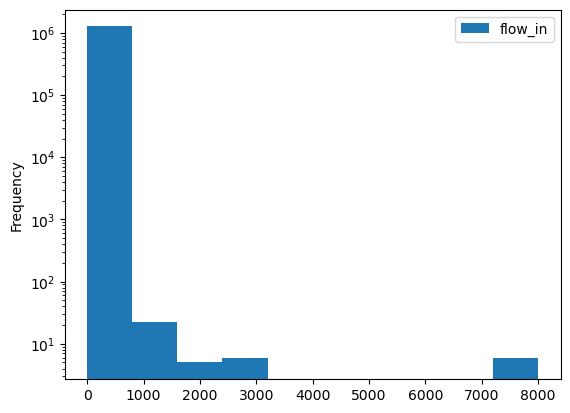

In [293]:
df_flow_schwartau.plot(kind="hist", y="flow_in")
plt.yscale('log')

StatementMeta(sparkpoolDev, 60, 47, Finished, Available, Finished)

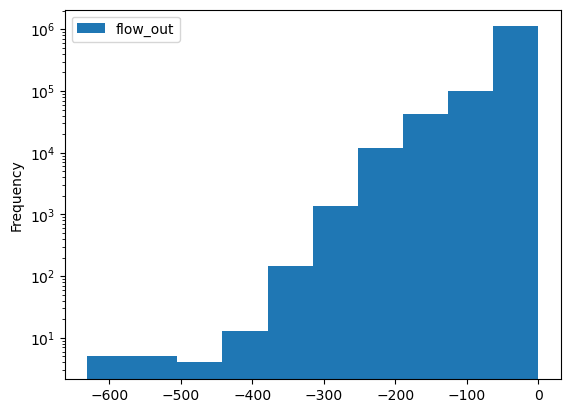

In [294]:
df_flow_schwartau.plot(kind="hist", y="flow_out")
plt.yscale('log')

In [295]:
df_flow_schwartau.info()

StatementMeta(sparkpoolDev, 60, 48, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267141 entries, 0 to 1267140
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype              
---  ------     --------------    -----              
 0   timestamp  1267141 non-null  datetime64[ns, UTC]
 1   flow_out   1267141 non-null  int32              
 2   flow_in    1267141 non-null  int32              
dtypes: datetime64[ns, UTC](1), int32(2)
memory usage: 19.3 MB


In [296]:
df_flow_schwartau.describe()

StatementMeta(sparkpoolDev, 60, 49, Finished, Available, Finished)

,flow_out,flow_in
count,1.267141e+06,1.267141e+06
mean,-2.150669e+01,2.467830e+01
std,4.215851e+01,5.495324e+01
min,-6.310000e+02,0.000000e+00
25%,-2.400000e+01,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,2.300000e+01
max,0.000000e+00,7.999000e+03


## humi_schwartau

In [297]:
df_humi_schwartau.info(show_counts=True)

StatementMeta(sparkpoolDev, 60, 50, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1761 non-null   datetime64[ns]
 1   humidity   1749 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.6 KB


In [298]:
df_humi_schwartau.columns

StatementMeta(sparkpoolDev, 60, 51, Finished, Available, Finished)

Index(['timestamp', 'humidity'], dtype='object')

In [299]:
df_humi_schwartau.describe()

StatementMeta(sparkpoolDev, 60, 52, Finished, Available, Finished)

,humidity
count,1749.000000
mean,83.987816
std,26.501959
min,-100.000000
25%,79.330000
50%,91.070000
75%,96.610000
max,100.000000


StatementMeta(sparkpoolDev, 60, 53, Finished, Available, Finished)

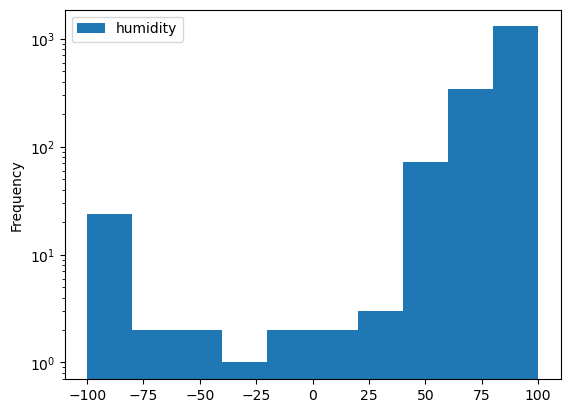

In [300]:
df_humi_schwartau.plot(kind="hist")
plt.yscale('log')

StatementMeta(sparkpoolDev, 60, 54, Finished, Available, Finished)

<Axes: xlabel='timestamp'>

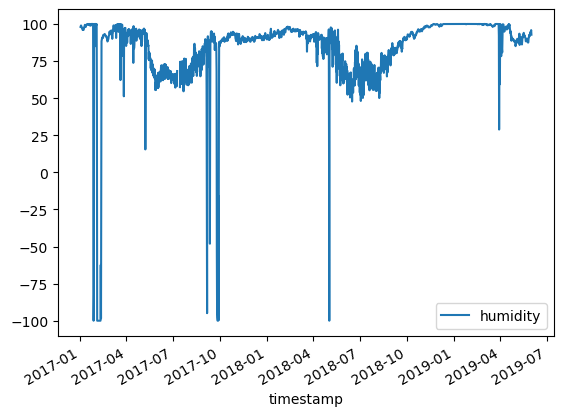

In [301]:
df_humi_schwartau.plot(x="timestamp", y="humidity") # values which go below zero can be filled with ffill() or interpolate()

<div class="alert alert-block alert-warning">
<b>Problem:</b> humidity can't go below 0
</div>

In [302]:
df_humi_schwartau.isna().sum()

StatementMeta(sparkpoolDev, 60, 55, Finished, Available, Finished)

timestamp     0
humidity     12
dtype: int64

In [303]:
# Find where humidity is less than 0
df_humi_schwartau.loc[df_humi_schwartau["humidity"] < 0]

StatementMeta(sparkpoolDev, 60, 56, Finished, Available, Finished)

,timestamp,humidity
51,2017-01-27 01:00:00,-100.00
52,2017-01-27 13:00:00,-82.25
65,2017-02-03 01:00:00,-100.00
66,2017-02-03 13:00:00,-100.00
67,2017-02-04 01:00:00,-100.00
68,2017-02-04 13:00:00,-100.00
69,2017-02-05 01:00:00,-100.00
70,2017-02-05 13:00:00,-100.00
71,2017-02-06 01:00:00,-100.00
72,2017-02-06 13:00:00,-100.00


In [304]:
# Set that value to NaN
df_humi_schwartau.loc[df_humi_schwartau['humidity'] < 0, 'humidity'] = np.nan

df_humi_schwartau.loc[df_humi_schwartau["humidity"] < 0].count()

StatementMeta(sparkpoolDev, 60, 57, Finished, Available, Finished)

timestamp    0
humidity     0
dtype: int64

In [305]:
df_humi_schwartau.isnull().sum()

StatementMeta(sparkpoolDev, 60, 58, Finished, Available, Finished)

timestamp     0
humidity     43
dtype: int64

<div class="alert alert-block alert-warning">
<b>Problem:</b> humidity has null values
</div>

In [306]:
df_humi_schwartau["humidity"]=df_humi_schwartau["humidity"].interpolate()
df_humi_schwartau.isnull().sum()

StatementMeta(sparkpoolDev, 60, 59, Finished, Available, Finished)

timestamp    0
humidity     0
dtype: int64

<div class="alert alert-block alert-success">
<b>Fixed:</b> humidity values below 0 and null values
</div>

StatementMeta(sparkpoolDev, 60, 60, Finished, Available, Finished)

<Axes: xlabel='timestamp'>

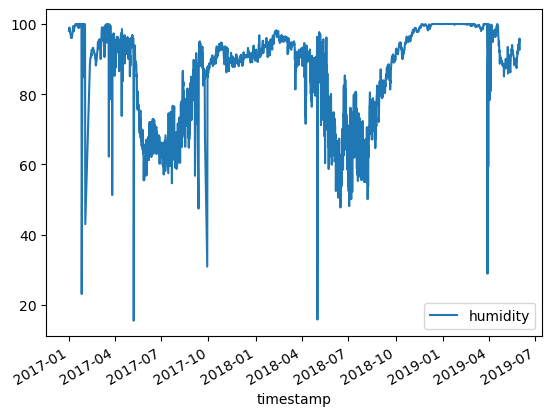

In [307]:
df_humi_schwartau.plot(x="timestamp", y="humidity") # There are still some outliers. But we don't got values under 0 anymore.

<div class="alert alert-block alert-warning">
<b>Problem:</b> Outliers in humidity df
</div>

In [308]:
df_humi_schwartau.duplicated().sum()

StatementMeta(sparkpoolDev, 60, 61, Finished, Available, Finished)

0

In [309]:
(df_humi_schwartau['timestamp'] - df_humi_schwartau['timestamp'].shift(1)).unique()

StatementMeta(sparkpoolDev, 60, 62, Finished, Available, Finished)

array([         'NaT', 43200000000000, 46800000000000, 39600000000000],
      dtype='timedelta64[ns]')

In [310]:
(df_humi_schwartau['timestamp'] - df_humi_schwartau['timestamp'].shift(1)).value_counts()

StatementMeta(sparkpoolDev, 60, 63, Finished, Available, Finished)

0 days 12:00:00    1755
0 days 13:00:00       3
0 days 11:00:00       2
Name: timestamp, dtype: int64

<div class="alert alert-block alert-warning">
<b>Problem:</b> not arranged homogeneous
</div>

In [311]:
df_humi_schwartau['timestamp']

StatementMeta(sparkpoolDev, 60, 64, Finished, Available, Finished)

0      2017-01-01 13:00:00
1      2017-01-02 01:00:00
2      2017-01-02 13:00:00
3      2017-01-03 01:00:00
4      2017-01-03 13:00:00
               ...        
1756   2019-05-29 14:00:00
1757   2019-05-30 02:00:00
1758   2019-05-30 14:00:00
1759   2019-05-31 02:00:00
1760   2019-05-31 14:00:00
Name: timestamp, Length: 1761, dtype: datetime64[ns]

In [312]:
#In Germany, Daylight Saving Time (DST) ended on:

#🗓 Sunday, October 29, 2017
#🕓 At 03:00 AM, clocks were set back to 02:00 AM

#There were two different 02:00:00 timestamps on that day:
#2017-10-29 02:00:00+02:00 -> DST (CEST, UTC+2) -> Before clock change
#2017-10-29 02:00:00+01:00 -> Standard Time (CET, UTC+1) -> After clock change

StatementMeta(sparkpoolDev, 60, 65, Finished, Available, Finished)

<div class="alert alert-block alert-warning">
<b>Problem:</b> AmbiguousTimeError: 2017-10-29 02:00:00
</div>

In [313]:
# Ensure the DataFrame is sorted first
df_humi_schwartau = df_humi_schwartau.sort_values(by='timestamp').reset_index(drop=True)

# --- The Key Step: Assign the result back to the column ---
print("Localizing and converting timestamps...")
df_humi_schwartau['timestamp'] = df_humi_schwartau['timestamp'].dt.tz_localize(
    'Europe/Berlin',
    ambiguous='NaT',
    nonexistent='NaT'
).dt.tz_convert('UTC')
print("Operation complete.")

print("\nVerifying the new data type:")
print(df_humi_schwartau['timestamp'].dtype)

StatementMeta(sparkpoolDev, 60, 66, Finished, Available, Finished)

Localizing and converting timestamps...
Operation complete.

Verifying the new data type:
datetime64[ns, UTC]


In [314]:
print(f"Number of NaT values to fix: {df_humi_schwartau['timestamp'].isnull().sum()}")

StatementMeta(sparkpoolDev, 60, 67, Finished, Available, Finished)

Number of NaT values to fix: 2


In [315]:
# 1. Sort the DataFrame by its index to ensure correct row order.
#    Interpolation depends on the previous and next rows being correct.
df_humi_schwartau.sort_index(inplace=True)

# 2. Create the numeric series from the timestamp column.
#    NaT becomes a large negative integer here.
numeric_ts = df_humi_schwartau['timestamp'].astype('int64')

# 3. Replace the integer representation of NaT with a standard NaN.
#    The interpolate() function is designed to work with np.nan.
numeric_ts.replace(pd.NaT.value, np.nan, inplace=True)

# 4. Interpolate the numeric series.
numeric_ts.interpolate(inplace=True)

# 5. Convert the interpolated numeric values back to a UTC datetime format.
df_humi_schwartau['timestamp'] = pd.to_datetime(numeric_ts.astype('int64'), utc=True)

print("Value at index 601:")
print(df_humi_schwartau.loc[601])

print("\nDataFrame around the previously missing value:")
print(df_humi_schwartau.loc[600:602])

StatementMeta(sparkpoolDev, 60, 68, Finished, Available, Finished)

Value at index 601:
timestamp    2017-10-29 00:00:00+00:00
humidity                         93.11
Name: 601, dtype: object

DataFrame around the previously missing value:
                    timestamp  humidity
600 2017-10-28 12:00:00+00:00     92.81
601 2017-10-29 00:00:00+00:00     93.11
602 2017-10-29 12:00:00+00:00     93.30


In [316]:
df_humi_schwartau.loc[595:605]

StatementMeta(sparkpoolDev, 60, 69, Finished, Available, Finished)

,timestamp,humidity
595,2017-10-26 00:00:00+00:00,94.75
596,2017-10-26 12:00:00+00:00,94.20
597,2017-10-27 00:00:00+00:00,94.45
598,2017-10-27 12:00:00+00:00,93.94
599,2017-10-28 00:00:00+00:00,92.78
600,2017-10-28 12:00:00+00:00,92.81
601,2017-10-29 00:00:00+00:00,93.11
602,2017-10-29 12:00:00+00:00,93.30
603,2017-10-30 00:00:00+00:00,93.50
604,2017-10-30 12:00:00+00:00,91.68


In [317]:
# 1. Set your clean timestamp column as the index of the DataFrame
df_humi_schwartau = df_humi_schwartau.set_index('timestamp')

# 2. Resample the DataFrame to a 12-hour ('12H') frequency.
#    We must tell pandas how to aggregate the other data columns. '.mean()' is common.
#    You could also use .first(), .last(), .sum(), etc. depending on your data.
df_final_humi = df_humi_schwartau.resample('12h').mean()

# 3. (Optional) Reset the index if you want 'timestamp' back as a column
df_final_humi = df_final_humi.reset_index()

StatementMeta(sparkpoolDev, 60, 70, Finished, Available, Finished)

In [318]:
(df_final_humi['timestamp'] - df_final_humi['timestamp'].shift(1)).value_counts()

StatementMeta(sparkpoolDev, 60, 71, Finished, Available, Finished)

0 days 12:00:00    1760
Name: timestamp, dtype: int64

In [319]:
df_final_humi.loc[595:605]

StatementMeta(sparkpoolDev, 60, 72, Finished, Available, Finished)

,timestamp,humidity
595,2017-10-26 00:00:00+00:00,94.75
596,2017-10-26 12:00:00+00:00,94.20
597,2017-10-27 00:00:00+00:00,94.45
598,2017-10-27 12:00:00+00:00,93.94
599,2017-10-28 00:00:00+00:00,92.78
600,2017-10-28 12:00:00+00:00,92.81
601,2017-10-29 00:00:00+00:00,93.11
602,2017-10-29 12:00:00+00:00,93.30
603,2017-10-30 00:00:00+00:00,93.50
604,2017-10-30 12:00:00+00:00,91.68


In [320]:
df_humi_schwartau = df_final_humi

StatementMeta(sparkpoolDev, 60, 73, Finished, Available, Finished)

In [321]:
df_humi_schwartau

StatementMeta(sparkpoolDev, 60, 74, Finished, Available, Finished)

,timestamp,humidity
0,2017-01-01 12:00:00+00:00,98.04
1,2017-01-02 00:00:00+00:00,98.61
2,2017-01-02 12:00:00+00:00,99.00
3,2017-01-03 00:00:00+00:00,98.49
4,2017-01-03 12:00:00+00:00,98.32
...,...,...
1756,2019-05-29 12:00:00+00:00,92.87
1757,2019-05-30 00:00:00+00:00,94.77
1758,2019-05-30 12:00:00+00:00,94.90
1759,2019-05-31 00:00:00+00:00,95.84


In [322]:
(df_humi_schwartau['timestamp'] - df_humi_schwartau['timestamp'].shift(1)).value_counts()

StatementMeta(sparkpoolDev, 60, 75, Finished, Available, Finished)

0 days 12:00:00    1760
Name: timestamp, dtype: int64

In [323]:
df_humi_schwartau.info()

StatementMeta(sparkpoolDev, 60, 76, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  1761 non-null   datetime64[ns, UTC]
 1   humidity   1761 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 27.6 KB


<div class="alert alert-block alert-success">
<b>Fixed:</b> Not arranged homogeneous and Ambiguous Time Error
</div>

In [324]:
df_humi_schwartau.loc[df_humi_schwartau['timestamp'].dt.strftime('%Y-%m-%d') == "2017-10-29"]

StatementMeta(sparkpoolDev, 60, 77, Finished, Available, Finished)

,timestamp,humidity
601,2017-10-29 00:00:00+00:00,93.11
602,2017-10-29 12:00:00+00:00,93.30


In [325]:
df_humi_schwartau.loc[df_humi_schwartau['timestamp'].dt.strftime('%Y-%m-%d') == "2018-10-28"]

StatementMeta(sparkpoolDev, 60, 78, Finished, Available, Finished)

,timestamp,humidity
1329,2018-10-28 00:00:00+00:00,96.52
1330,2018-10-28 12:00:00+00:00,96.55


In [326]:
df_humi_schwartau.loc[595:605]

StatementMeta(sparkpoolDev, 60, 79, Finished, Available, Finished)

,timestamp,humidity
595,2017-10-26 00:00:00+00:00,94.75
596,2017-10-26 12:00:00+00:00,94.20
597,2017-10-27 00:00:00+00:00,94.45
598,2017-10-27 12:00:00+00:00,93.94
599,2017-10-28 00:00:00+00:00,92.78
600,2017-10-28 12:00:00+00:00,92.81
601,2017-10-29 00:00:00+00:00,93.11
602,2017-10-29 12:00:00+00:00,93.30
603,2017-10-30 00:00:00+00:00,93.50
604,2017-10-30 12:00:00+00:00,91.68


In [327]:
#df_humi_schwartau["timestamp"] = df_humi_schwartau["timestamp"].dt.tz_localize("Europe/Berlin", ambiguous=pd.Series(True, index=df_humi_schwartau.index)).dt.tz_convert("UTC")

StatementMeta(sparkpoolDev, 60, 80, Finished, Available, Finished)

## temp_schwartau

In [328]:
df_temp_schwartau.info(show_counts=True)

StatementMeta(sparkpoolDev, 60, 81, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253430 entries, 0 to 253429
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   timestamp    253430 non-null  datetime64[ns]
 1   temperature  251398 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 MB


In [329]:
df_temp_schwartau.columns

StatementMeta(sparkpoolDev, 60, 82, Finished, Available, Finished)

Index(['timestamp', 'temperature'], dtype='object')

In [330]:
df_temp_schwartau.describe()

StatementMeta(sparkpoolDev, 60, 83, Finished, Available, Finished)

,temperature
count,251398.000000
mean,22.609671
std,11.702222
min,-7.260000
25%,12.450000
50%,24.480000
75%,34.220000
max,37.530000


In [331]:
df_temp_schwartau.duplicated().sum()

StatementMeta(sparkpoolDev, 60, 84, Finished, Available, Finished)

0

StatementMeta(sparkpoolDev, 60, 85, Finished, Available, Finished)

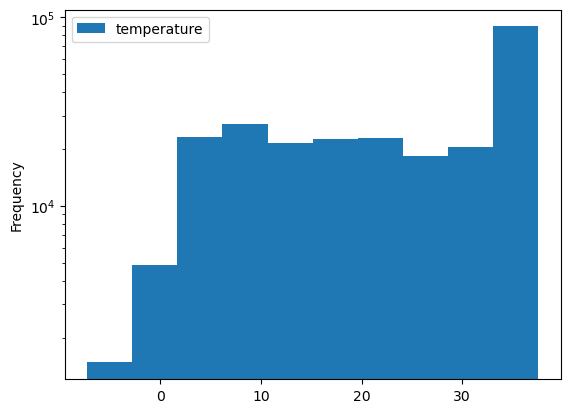

In [332]:
df_temp_schwartau.plot(kind="hist")
plt.yscale('log')

StatementMeta(sparkpoolDev, 60, 86, Finished, Available, Finished)

<Axes: xlabel='timestamp'>

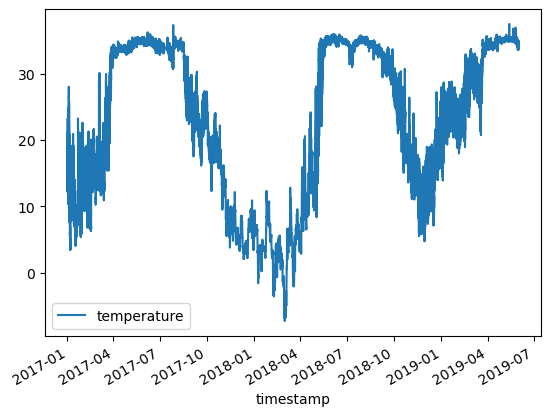

In [333]:
df_temp_schwartau.plot(x="timestamp", y="temperature")

In [334]:
df_temp_schwartau.isna().sum()

StatementMeta(sparkpoolDev, 60, 87, Finished, Available, Finished)

timestamp         0
temperature    2032
dtype: int64

<div class="alert alert-block alert-warning">
<b>Problem:</b> temperature has null values
</div>

In [335]:
df_temp_schwartau["temperature"] = df_temp_schwartau["temperature"].interpolate()

StatementMeta(sparkpoolDev, 60, 88, Finished, Available, Finished)

In [336]:
df_temp_schwartau.isna().sum()

StatementMeta(sparkpoolDev, 60, 89, Finished, Available, Finished)

timestamp      0
temperature    1
dtype: int64

In [337]:
df_temp_schwartau["temperature"] = df_temp_schwartau["temperature"].bfill()

StatementMeta(sparkpoolDev, 60, 90, Finished, Available, Finished)

In [338]:
df_temp_schwartau.isna().sum()

StatementMeta(sparkpoolDev, 60, 91, Finished, Available, Finished)

timestamp      0
temperature    0
dtype: int64

StatementMeta(sparkpoolDev, 60, 92, Finished, Available, Finished)

<Axes: xlabel='timestamp'>

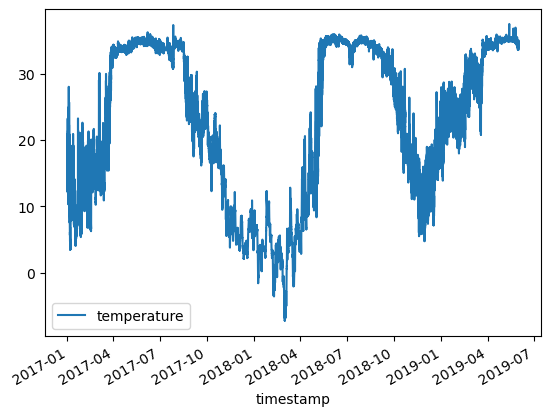

In [339]:
df_temp_schwartau.plot(x="timestamp", y="temperature")

<div class="alert alert-block alert-success">
<b>Fixed:</b> temperature null values - used combination of interpolate() and bfill()
</div>

In [340]:
(df_temp_schwartau['timestamp'] - df_temp_schwartau['timestamp'].shift(1)).unique()

StatementMeta(sparkpoolDev, 60, 93, Finished, Available, Finished)

array([         'NaT',   300000000000,  3900000000000, -3300000000000],
      dtype='timedelta64[ns]')

<div class="alert alert-block alert-warning">
<b>Problem:</b> not arranged homogeneous
</div>

In [341]:
df_temp_schwartau["timestamp"] = df_temp_schwartau['timestamp'].dt.tz_localize("Europe/Berlin", ambiguous='infer').dt.tz_convert("UTC")

StatementMeta(sparkpoolDev, 60, 94, Finished, Available, Finished)

In [342]:
(df_temp_schwartau['timestamp'] - df_temp_schwartau['timestamp'].shift(1)).value_counts()

StatementMeta(sparkpoolDev, 60, 95, Finished, Available, Finished)

0 days 00:05:00    253429
Name: timestamp, dtype: int64

<div class="alert alert-block alert-success">
<b>Fixed:</b> Not arranged homogeneous
</div>

In [343]:
df_temp_schwartau['timestamp']

StatementMeta(sparkpoolDev, 60, 96, Finished, Available, Finished)

0        2017-01-01 13:10:00+00:00
1        2017-01-01 13:15:00+00:00
2        2017-01-01 13:20:00+00:00
3        2017-01-01 13:25:00+00:00
4        2017-01-01 13:30:00+00:00
                    ...           
253425   2019-05-31 11:55:00+00:00
253426   2019-05-31 12:00:00+00:00
253427   2019-05-31 12:05:00+00:00
253428   2019-05-31 12:10:00+00:00
253429   2019-05-31 12:15:00+00:00
Name: timestamp, Length: 253430, dtype: datetime64[ns, UTC]

In [344]:
#df_temp_schwartau['timestamp'] = df_temp_schwartau['timestamp'].dt.tz_localize("Europe/Berlin", ambiguous='infer').dt.tz_convert('UTC')

StatementMeta(sparkpoolDev, 60, 97, Finished, Available, Finished)

In [345]:
df_temp_schwartau.info()

StatementMeta(sparkpoolDev, 60, 98, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253430 entries, 0 to 253429
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   timestamp    253430 non-null  datetime64[ns, UTC]
 1   temperature  253430 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 3.9 MB


## weight_schwartau

In [346]:
df_weight_schwartau.info(show_counts=True)

StatementMeta(sparkpoolDev, 60, 99, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1761 non-null   datetime64[ns]
 1   weight     1749 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.6 KB


In [347]:
df_weight_schwartau.columns

StatementMeta(sparkpoolDev, 60, 100, Finished, Available, Finished)

Index(['timestamp', 'weight'], dtype='object')

In [348]:
df_weight_schwartau.duplicated().sum()

StatementMeta(sparkpoolDev, 60, 101, Finished, Available, Finished)

0

In [349]:
df_weight_schwartau.describe() # weight is prbably in grams for whole hive

StatementMeta(sparkpoolDev, 60, 102, Finished, Available, Finished)

,weight
count,1749.000000
mean,56807.637313
std,16926.937629
min,-172.440000
25%,49793.360000
50%,58029.270000
75%,67322.570000
max,92042.230000


StatementMeta(sparkpoolDev, 60, 103, Finished, Available, Finished)

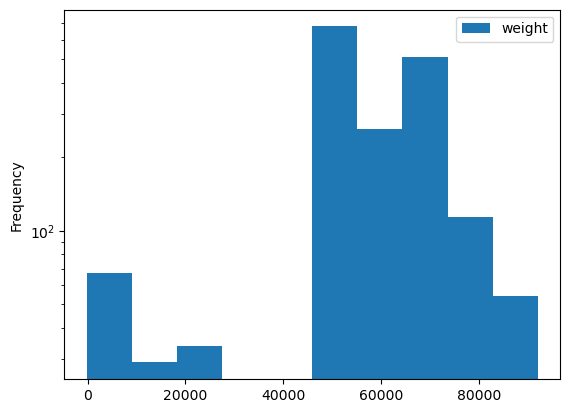

In [350]:
df_weight_schwartau.plot(kind="hist")
plt.yscale('log')

StatementMeta(sparkpoolDev, 60, 104, Finished, Available, Finished)

<Axes: xlabel='timestamp'>

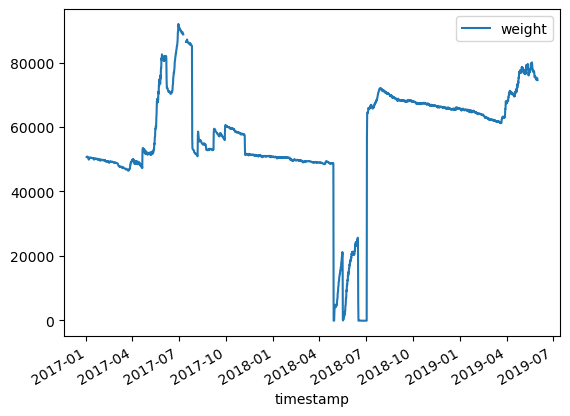

In [351]:
df_weight_schwartau.plot(x="timestamp", y="weight") # what happened in late spring of 2018?!

In [352]:
(df_weight_schwartau['timestamp'] - df_weight_schwartau['timestamp'].shift(1)).value_counts()

StatementMeta(sparkpoolDev, 60, 105, Finished, Available, Finished)

0 days 12:00:00    1755
0 days 13:00:00       3
0 days 11:00:00       2
Name: timestamp, dtype: int64

<div class="alert alert-block alert-warning">
<b>Problem:</b> not arranged regualare
</div>

In [353]:
#df_weight_schwartau["timestamp"] = df_weight_schwartau['timestamp'].dt.tz_localize("Europe/Berlin", ambiguous='infer').dt.tz_convert("UTC")

StatementMeta(sparkpoolDev, 60, 106, Finished, Available, Finished)

<div class="alert alert-block alert-warning">
<b>Problem:</b> AmbiguousTimeError: 2017-10-29 02:00:00
</div>

In [354]:
# Ensure the DataFrame is sorted first
df_weight_schwartau = df_weight_schwartau.sort_values(by='timestamp').reset_index(drop=True)

# --- The Key Step: Assign the result back to the column ---
print("Localizing and converting timestamps...")
df_weight_schwartau['timestamp'] = df_weight_schwartau['timestamp'].dt.tz_localize(
    'Europe/Berlin',
    ambiguous='NaT',
    nonexistent='NaT'
).dt.tz_convert('UTC')
print("Operation complete.")

# --- Now, verify the change ---
print("\nVerifying the new data type:")
print(df_weight_schwartau['timestamp'].dtype)

StatementMeta(sparkpoolDev, 60, 107, Finished, Available, Finished)

Localizing and converting timestamps...
Operation complete.

Verifying the new data type:
datetime64[ns, UTC]


In [355]:
print(f"Number of NaT values to fix: {df_weight_schwartau['timestamp'].isnull().sum()}")

StatementMeta(sparkpoolDev, 60, 108, Finished, Available, Finished)

Number of NaT values to fix: 2


In [356]:
df_weight_schwartau.loc[df_weight_schwartau['timestamp'].isnull()]

StatementMeta(sparkpoolDev, 60, 109, Finished, Available, Finished)

,timestamp,weight
601,NaT,57872.35
1329,NaT,66967.01


In [357]:
# 1. IMPORTANT: Sort the DataFrame by its index to ensure correct row order.
#    Interpolation depends on the previous and next rows being correct.
df_weight_schwartau.sort_index(inplace=True)

# 2. Create the numeric series from the timestamp column.
#    NaT becomes a large negative integer here.
numeric_ts = df_weight_schwartau['timestamp'].astype('int64')

# 3. CRUCIAL FIX: Replace the integer representation of NaT with a standard NaN.
#    The interpolate() function is designed to work with np.nan.
numeric_ts.replace(pd.NaT.value, np.nan, inplace=True)

# 4. Interpolate the numeric series. This will now work correctly.
numeric_ts.interpolate(inplace=True)

# 5. Convert the interpolated numeric values back to a UTC datetime format.
#    We must convert from float back to int before converting to datetime.
df_weight_schwartau['timestamp'] = pd.to_datetime(numeric_ts.astype('int64'), utc=True)

# --- End of Solution ---

# Verify the result for the specific row
print("Value at index 601:")
print(df_weight_schwartau.loc[601])

# Check the surrounding rows to confirm
print("\nDataFrame around the previously missing value:")
print(df_weight_schwartau.loc[600:602])

StatementMeta(sparkpoolDev, 60, 110, Finished, Available, Finished)

Value at index 601:
timestamp    2017-10-29 00:00:00+00:00
weight                        57872.35
Name: 601, dtype: object

DataFrame around the previously missing value:
                    timestamp    weight
600 2017-10-28 12:00:00+00:00  58115.67
601 2017-10-29 00:00:00+00:00  57872.35
602 2017-10-29 12:00:00+00:00  57885.76


In [358]:
# 1. Set your clean timestamp column as the index of the DataFrame
df_weight_schwartau = df_weight_schwartau.set_index('timestamp')

# 2. Resample the DataFrame to a 12-hour ('12H') frequency.
#    We must tell pandas how to aggregate the other data columns. '.mean()' is common.
#    You could also use .first(), .last(), .sum(), etc. depending on your data.
df_final_weight = df_weight_schwartau.resample('12h').mean()

# 3. (Optional) Reset the index if you want 'timestamp' back as a column
df_final_weight = df_final_weight.reset_index()

StatementMeta(sparkpoolDev, 60, 111, Finished, Available, Finished)

In [359]:
df_weight_schwartau = df_final_weight

StatementMeta(sparkpoolDev, 60, 112, Finished, Available, Finished)

In [360]:
(df_weight_schwartau['timestamp'] - df_weight_schwartau['timestamp'].shift(1)).value_counts()

StatementMeta(sparkpoolDev, 60, 113, Finished, Available, Finished)

0 days 12:00:00    1760
Name: timestamp, dtype: int64

<div class="alert alert-block alert-success">
<b>Fixed:</b> Not arranged homogeneous + null values
</div>

In [361]:
df_weight_schwartau.loc[df_weight_schwartau["weight"] < 0].count()

StatementMeta(sparkpoolDev, 60, 114, Finished, Available, Finished)

timestamp    37
weight       37
dtype: int64

In [362]:
df_weight_schwartau.isna().sum()

StatementMeta(sparkpoolDev, 60, 115, Finished, Available, Finished)

timestamp     0
weight       12
dtype: int64

<div class="alert alert-block alert-warning">
<b>Problem:</b> weight is beneath 0 and null values
</div>

In [363]:
df_weight_schwartau.loc[df_weight_schwartau["weight"] < 0, "weight"] = np.nan

StatementMeta(sparkpoolDev, 60, 116, Finished, Available, Finished)

In [364]:
df_weight_schwartau.loc[df_weight_schwartau["weight"] < 0].count()

StatementMeta(sparkpoolDev, 60, 117, Finished, Available, Finished)

timestamp    0
weight       0
dtype: int64

In [365]:
df_weight_schwartau["weight"] = df_weight_schwartau["weight"].interpolate()

StatementMeta(sparkpoolDev, 60, 118, Finished, Available, Finished)

In [366]:
df_weight_schwartau.isnull().sum()

StatementMeta(sparkpoolDev, 60, 119, Finished, Available, Finished)

timestamp    0
weight       0
dtype: int64

<div class="alert alert-block alert-success">
<b>Fixed:</b> Null values
</div>

StatementMeta(sparkpoolDev, 60, 120, Finished, Available, Finished)

<Axes: xlabel='timestamp'>

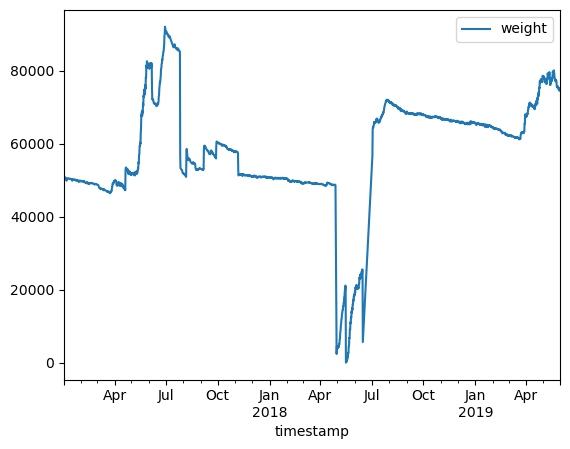

In [367]:
df_weight_schwartau.plot(x="timestamp", y="weight")

<div class="alert alert-block alert-success">
<b>Fixed:</b> values below zero
</div>

In [368]:
df_weight_schwartau.info()

StatementMeta(sparkpoolDev, 60, 121, Finished, Available, Finished)

In [369]:
df_weight_schwartau.describe()

StatementMeta(sparkpoolDev, 60, 122, Finished, Available, Finished)

,weight
count,1761.000000
mean,57620.051031
std,15520.022077
min,35.990000
25%,49809.270000
50%,58115.670000
75%,67390.930000
max,92042.230000


## Standardize File Formats - Parquet

In [ ]:
from pathlib import Path # Make sure Path is imported

# Define the sink path as a simple string, not a Path object
sink_path = f'{data_lake_path}/silver/interim'

subfolders = ['flow', 'humidity', 'temperature', 'weight']
for folder in subfolders:
    # Use dbutils.fs.mkdirs to create folders in the data lake
    # Note: This is an equivalent to mkdirs for a distributed filesystem
    mssparkutils.fs.mkdirs(f"{sink_path}/{folder}")
    
print("All necessary directories are created or already exist.")

timestamp_str = spark._jvm.java.time.Instant.now().toString()

# Convert to spark DataFrames
spark_df_flow = spark.createDataFrame(df_flow_schwartau)
spark_df_flow.printSchema()
spark_df_humi = spark.createDataFrame(df_humi_schwartau)
spark_df_humi.printSchema()
spark_df_temp = spark.createDataFrame(df_temp_schwartau)
spark_df_temp.printSchema()
spark_df_weight = spark.createDataFrame(df_weight_schwartau)
spark_df_weight.printSchema()


spark_df_flow.write.parquet(
    f'{sink_path}/flow/schwartau_flow__{timestamp_str}.parquet', 
    mode='overwrite' # Use 'overwrite' to replace existing files, or 'append'
)
spark_df_humi.write.parquet(
    f'{sink_path}/humidity/schwartau_humidity__{timestamp_str}.parquet', 
    mode='overwrite'
)
spark_df_temp.write.parquet(
    f'{sink_path}/temperature/schwartau_temperature__{timestamp_str}.parquet', 
    mode='overwrite'
)
spark_df_weight.write.parquet(
    f'{sink_path}/weight/schwartau_weight__{timestamp_str}.parquet', 
    mode='overwrite'
)

print("All files saved successfully.")


StatementMeta(, , -1, Waiting, , Waiting)

# Weather API Data

In [ ]:
import pandas as pd
from pyspark.sql.functions import col

# 1. Define the base path on the data lake
data_lake_path = "abfss://beehive-container@dsaidatalakestorage.dfs.core.windows.net" 
source_path = f"{data_lake_path}/silver/interim"

# A helper function to get the path of the latest file in a directory
def get_latest_file_path(folder_path):
    """Lists files in a data lake folder and returns the path of the newest one."""
    try:
        # List all items in the directory
        files_list = mssparkutils.fs.ls(folder_path)
        
        # Filter for parquet files and get their paths
        parquet_files = [f.path for f in files_list if f.name.endswith('.parquet')]
        
        if not parquet_files:
            return None
            
        return max(parquet_files)
    except Exception as e:
        print(f"Error accessing {folder_path}: {e}")
        return None

# 2. Find the latest file in each subfolder and read it
subfolders = ['flow', 'humidity', 'temperature', 'weight']
dataframes = {} # Use a dictionary to store the dataframes

for folder in subfolders:
    full_folder_path = f"{source_path}/{folder}"
    latest_file = get_latest_file_path(full_folder_path)
    
    if latest_file:
        print(f"Reading latest file from {folder}: {latest_file}")
        # Use Spark to read (handles authentication) and then convert to pandas
        spark_df = spark.read.parquet(latest_file)
        dataframes[folder] = spark_df.toPandas()
    else:
        print(f"No parquet files found in {folder}")

# 3. Now calculate the start and end dates from the loaded dataframes
# Check if all dataframes were loaded before proceeding
if len(dataframes) == len(subfolders):
    start_date = min(
        dataframes['flow']["timestamp"].min(),
        dataframes['humidity']["timestamp"].min(),
        dataframes['temperature']["timestamp"].min(),
        dataframes['weight']["timestamp"].min()
    )

    end_date = max(
        dataframes['flow']["timestamp"].max(),
        dataframes['humidity']["timestamp"].max(),
        dataframes['temperature']["timestamp"].max(),
        dataframes['weight']["timestamp"].max()
    )

    print("\nOverall Date Range:")
    print(f"Start Date: {start_date}")
    print(f"End Date: {end_date}")
else:
    print("\nCould not load all dataframes. Cannot calculate date range.")

In [9]:
import pandas as pd
import requests
import json

data_lake_path = "abfss://beehive-container@dsaidatalakestorage.dfs.core.windows.net"
weather_sink = f"{data_lake_path}/bronze/archive/weather/"

coords = {
"schwartau" : {"lat": 53.9163, "lon": 10.6854}
}

measures_to_ignore = [
"timestamp",
"source_id",
"condtion",
"precipitation_probability", # for foecasts only
"precipitation_probability_6h", # for forecasts only
"icon",
"fallback_source_ids"
]

# Define the parameters for the API request
url = "https://api.brightsky.dev/weather"
headers = {"Accept": "application/json"}
params = coords["schwartau"] | {"date": start_date} | {"last_date": end_date}

try:
    response = requests.get(url, headers=headers, params=params)
    response.raise_for_status() # A better way to check for HTTP errors

    bs_weather_data_json = response.json()
    
    # 1. Define the full path for the destination file
    file_path = weather_sink + f"schwartau__{start_date.strftime('%Y-%m-%d')}_{end_date.strftime('%Y-%m-%d')}.json"

    # 2. Convert Python dictionary (the JSON object) into a string
    json_content_string = json.dumps(bs_weather_data_json, indent=4)

    # 3. Use mssparkutils.fs.put() to write the string content to the data lake
    mssparkutils.fs.put(file_path, json_content_string, overwrite=True)
    
    print(f"Successfully saved JSON to {file_path}")

    sources_df = pd.DataFrame(bs_weather_data_json["sources"])

    for time in bs_weather_data_json["weather"]:
        temp_dict = {}
        for measure in time:
            if measure in measures_to_ignore:
                continue
    
            if measure in time.get("fallback_source_ids", {}):
                temp_dict[f"{measure}_source_distance"] = sources_df.loc[sources_df["id"] == time.get("fallback_source_ids", {}).get(measure), "distance"].values[0]
            else:
                temp_dict[f"{measure}_source_distance"] = sources_df.loc[sources_df["id"] == time["source_id"], "distance"].values[0]
    
        time.update(temp_dict)

    weather_df = (
        pd.DataFrame(bs_weather_data_json["weather"])
        .drop(["source_id", "visibility", "condition", "icon", "precipitation_probability", "precipitation_probability_6h", "fallback_source_ids", "condition_source_distance"], axis=1)
        .rename({"lat": "station_lat", "lon": "station_lon", "height": "station_elevation"}, axis=1)
    )

    weather_df["timestamp"] = pd.to_datetime(weather_df["timestamp"])
    
    weather_df.info()

except requests.exceptions.HTTPError as err:
    print(f"\nHTTP Error occurred: {err}")
    print("Response Content:", response.text)
except requests.exceptions.RequestException as err:
    print(f"\nAn error occurred: {err}")

StatementMeta(sparkpoolDev, 19, 10, Finished, Available, Finished)

Successfully saved JSON to abfss://beehive-container@dsaidatalakestorage.dfs.core.windows.net/bronze/archive/weather/schwartau__2017-01-01_2019-05-31.json
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21121 entries, 0 to 21120
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   timestamp                            21121 non-null  datetime64[ns, UTC]
 1   precipitation                        21121 non-null  float64            
 2   pressure_msl                         16385 non-null  float64            
 3   sunshine                             15698 non-null  float64            
 4   temperature                          16385 non-null  float64            
 5   wind_direction                       16385 non-null  float64            
 6   wind_speed                           16385 non-null  float64            
 7   cloud_cover                  

In [10]:
from pathlib import Path

sink_path = f'{data_lake_path}/silver/interim'

subfolders = ['weather']
for folder in subfolders:
    # Use dbutils.fs.mkdirs to create folders in the data lake
    mssparkutils.fs.mkdirs(f"{sink_path}/{folder}")
    
print("All necessary directories are created or already exist.")

timestamp_str = spark._jvm.java.time.Instant.now().toString()

# Convert to spark DataFrames
spark_weather_df = spark.createDataFrame(weather_df)
spark_weather_df.printSchema()


spark_weather_df.write.parquet(
    f'{sink_path}/weather/schwartau_weather__{timestamp_str}.parquet', 
    mode='overwrite' # Use 'overwrite' to replace existing files, or 'append'
)

print("All files saved successfully.")


StatementMeta(sparkpoolDev, 19, 11, Finished, Available, Finished)

All necessary directories are created or already exist.
root
 |-- timestamp: timestamp (nullable = true)
 |-- precipitation: double (nullable = true)
 |-- pressure_msl: double (nullable = true)
 |-- sunshine: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- wind_direction: double (nullable = true)
 |-- wind_speed: double (nullable = true)
 |-- cloud_cover: double (nullable = true)
 |-- dew_point: double (nullable = true)
 |-- relative_humidity: double (nullable = true)
 |-- wind_gust_direction: double (nullable = true)
 |-- wind_gust_speed: double (nullable = true)
 |-- solar: double (nullable = true)
 |-- precipitation_source_distance: double (nullable = true)
 |-- pressure_msl_source_distance: double (nullable = true)
 |-- sunshine_source_distance: double (nullable = true)
 |-- temperature_source_distance: double (nullable = true)
 |-- wind_direction_source_distance: double (nullable = true)
 |-- wind_speed_source_distance: double (nullable = true)
 |-- cloud_

# Stop Session

In [11]:
mssparkutils.session.stop()

StatementMeta(sparkpoolDev, 19, 12, Finished, Available, Finished)